In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = sns.load_dataset('titanic')
dataset 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

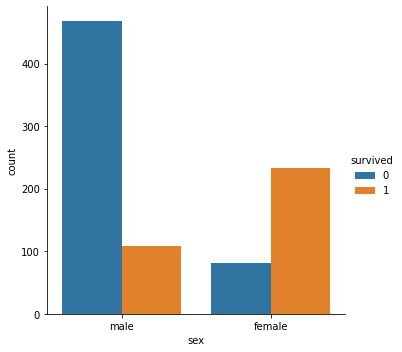

In [6]:
#countplot
sns.catplot(x="sex",hue="survived",kind="count",data=dataset)

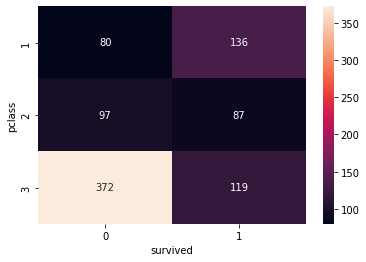

In [7]:
#Heatmap
#Grouping the dataset by pclass and Survived and then unstacking  them
group=dataset.groupby(['pclass','survived'])
pclass_survived=group.size().unstack()

#Heatmap - color encoded 2D representation of data
sns.heatmap(pclass_survived,annot=True,fmt='d')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


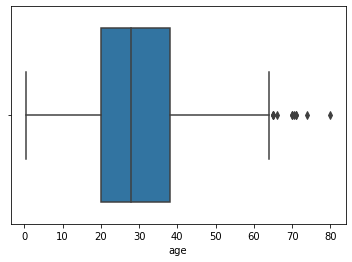

In [8]:
#Boxplot

sns.boxplot(dataset['age'] )

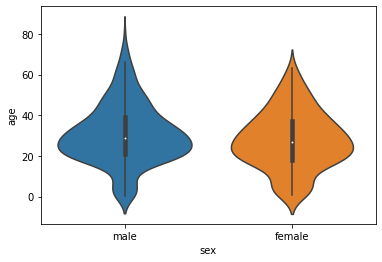

In [9]:
#Violinplot
sns.violinplot(x='sex', y='age', data=dataset)

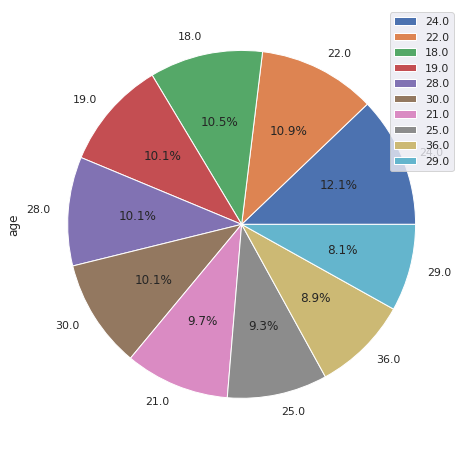

In [24]:
dataset["age"].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%', figsize=(8, 8)).legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


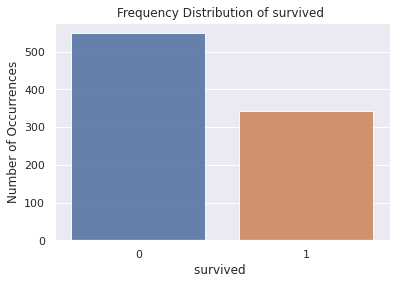

In [11]:
carrier_count = dataset["survived"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of survived ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('survived ', fontsize=12)
plt.show()

Text(0, 0.5, 'Survival Probability')

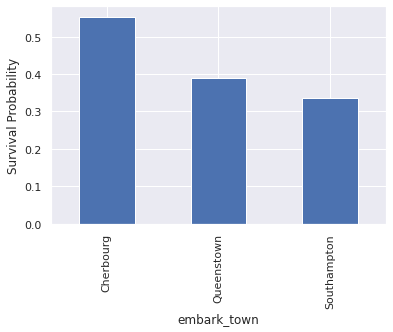

In [15]:
plt = dataset[['embark_town', 'survived']].groupby('embark_town').mean().survived.plot(kind='bar')
plt.set_xlabel('embark_town')
plt.set_ylabel('Survival Probability')


Text(0, 0.5, 'Survival Probability')

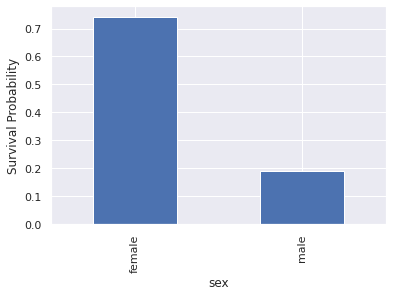

In [14]:
plt = dataset[['sex', 'survived']].groupby('sex').mean().survived.plot(kind='bar')
plt.set_xlabel('sex')
plt.set_ylabel('Survival Probability')


ValueError: ignored

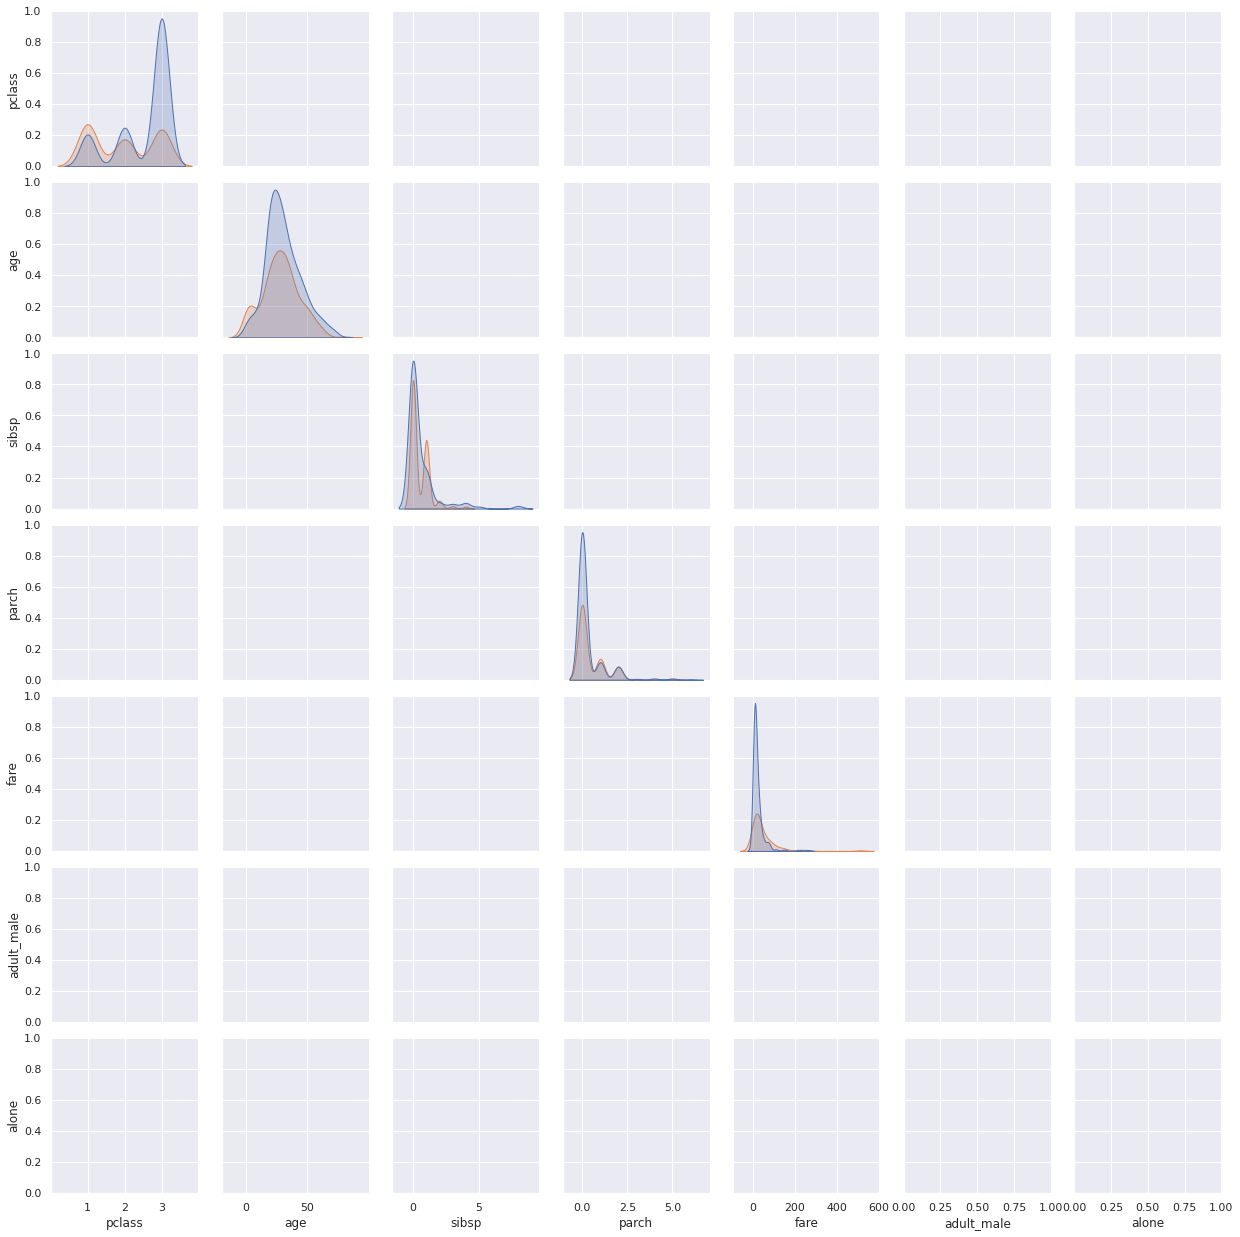

In [29]:
sns.pairplot(dataset, hue="survived")

<function matplotlib.pyplot.show>

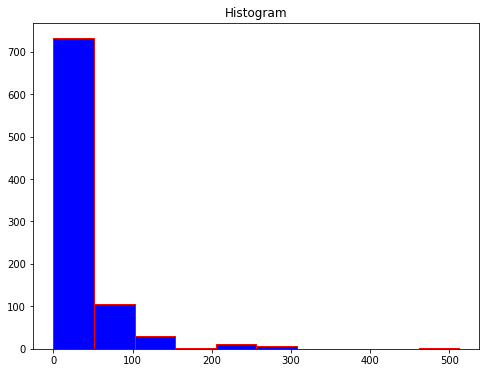

In [ ]:
#Histogram
fig,ax=plt.subplots(figsize=(8,6))
ax=plt.hist(dataset['fare'],color='b',edgecolor='r')
plt.title('Histogram')
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafb3a275d0>,
      dtype=object)

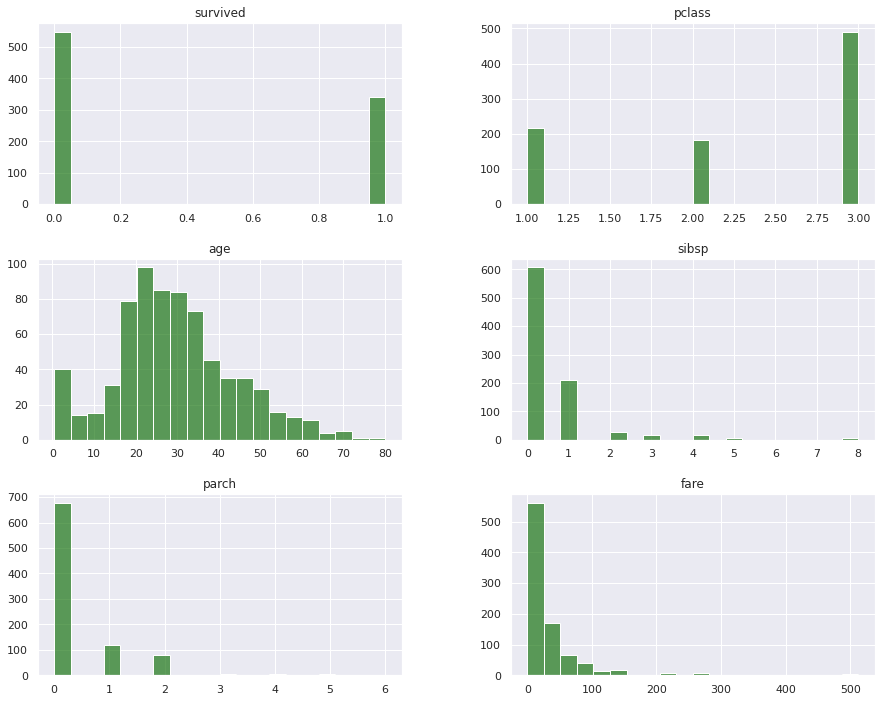

In [30]:
dataset.hist(figsize=(15,12), bins=20, color="#107009AA")

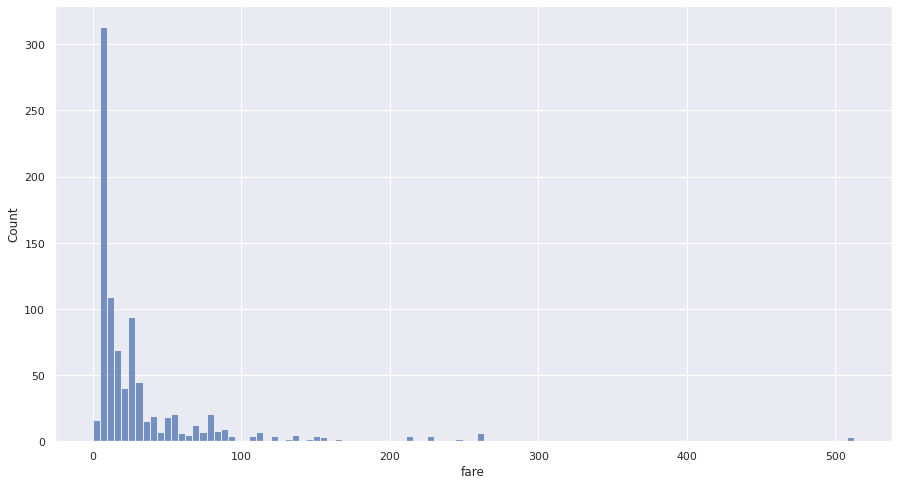

In [31]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(data=dataset, x="fare")